### Get and Clean Data

In [33]:
import numpy as np
import pandas as pd

#get training data
data_train = pd.read_csv('train2.csv')

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the kaggle website here is the meaning of each column:  

| Variable | Definition                                 | Key                       |
|----------|--------------------------------------------|---------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes           |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex      | Sex                                        |                           |
| Age      | Age in years                               |                           |
| sibsp    | # of siblings / spouses aboard the Titanic |                           |
| parch    | # of parents / children aboard the Titanic |                           |
| ticket   | Ticket number                              |                           |
| fare     | Passenger fare                             |                           |
| cabin    | Cabin number                               |                           |
| embarked | Port of Embarkation                        |C = Cherbourg, Q = Queenstown, S = Southampton |                           |


Next, we will clean up the data a bit. I will remove the name and ticket columns, convert the sex coloumn to either a 1 (male) or 0 (female). I will also put ages and fares into groups. 

In [35]:
#drop columns
data_train = data_train.drop(["Name", "Cabin", "Ticket"], axis = 1)

#group people by ages
data_train.Age = data_train.Age.fillna(-0.5)
bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
group_nums = [0, 1, 2, 3, 4, 5, 6, 7]
categories = pd.cut(data_train.Age, bins, labels=group_nums)
data_train.Age = categories

#group people by fare
data_train.Fare = data_train.Fare.fillna(10)

bins = (-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 50000)
group_nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
categories = pd.cut(data_train.Fare, bins, labels=group_nums)
data_train.Fare = categories

#convert sex to intergers
data_train['Sex'] = data_train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#convert embarked to an integer
freq_port = data_train.Embarked.dropna().mode()[0]
data_train['Embarked'] = data_train['Embarked'].fillna(freq_port)
data_train['Embarked'] = data_train['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)

#display
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,4,1,0,1,2
1,2,1,1,1,6,1,0,8,0
2,3,1,3,1,5,0,0,1,2
3,4,1,1,1,5,1,0,6,2
4,5,0,3,0,5,0,0,1,2


For the age column, 0 is an unknown age, 1 is a baby, 2 is a child, 3 is a preteen, 4 is a teenager, 5 is a twenties adult, 6 is an adult, and 7 is a senior. 

For the fare column, the person had a fare up to but less then x*10, where x is the column value. 

In preperation, I will clean the test data the same way. 

In [36]:
data_test = pd.read_csv('test.csv')
#drop columns
data_test = data_test.drop(["Name", "Cabin", "Ticket", "Embarked"], axis = 1)

#group people by ages
data_test.Age = data_test.Age.fillna(-0.5)
bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
group_nums = [0, 1, 2, 3, 4, 5, 6, 7]
categories = pd.cut(data_test.Age, bins, labels=group_nums)
data_test.Age = categories

#group people by fare
data_test.Fare = data_test.Fare.fillna(10)

bins = (-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 50000)
group_nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
categories = pd.cut(data_test.Fare, bins, labels=group_nums)
data_test.Fare = categories

#convert sex to intergers
data_test['Sex'] = data_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#convert embarked to an integer
#freq_port = data_test.Embarked.dropna().mode()[0]
#data_test['Embarked'] = data_test['Embarked'].fillna(freq_port)
#data_test['Embarked'] = data_test['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)


### Logistic Regression on Data

In [37]:
data_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,4,1,0,1,2
1,2,1,1,1,6,1,0,8,0
2,3,1,3,1,5,0,0,1,2
3,4,1,1,1,5,1,0,6,2
4,5,0,3,0,5,0,0,1,2
5,6,0,3,0,0,0,0,1,1
6,7,0,1,0,6,0,0,6,2
7,8,0,3,0,1,3,1,3,2
8,9,1,3,1,5,0,2,2,2
9,10,1,2,1,3,1,0,4,0


In [38]:
data_train.insert(0, 'Ones', 1) # add column of ones for matrix multiplication later

In [39]:
train=data_train.sample(frac=0.8,random_state=200)
cross=data_train.drop(train.index)

In [40]:
X = train.drop(["Survived"], axis = 1)
Y = train["Survived"]
X = np.matrix(X.values) 
Y = np.matrix(Y.values) 
crossX = cross.drop(["Survived"], axis = 1)
crossY = cross["Survived"]
crossX = np.matrix(crossX.values) 
crossY = np.matrix(crossY.values) 

theta = np.zeros(X.shape[1])
theta = np.matrix(theta)
lambd = 1

In [41]:
print(X.shape)
print(Y.shape)
print(crossX.shape)
print(crossY.shape)
print(theta.shape)

(240, 9)
(1, 240)
(60, 9)
(1, 60)
(1, 9)


In logistic funcition we want to have values between 0 and 1. For this the hypothesis is:
![h(x) = g(theta*x)](hypothesis.png)

Where:
![g(z) = 1 over 1 + e to the negative z](sigmoid.png)

The hypothesis uses the sigmoid function to return a value between 1 or 0.  

In [42]:
import scipy.special as sp
# compute sigmoid function
def sigmoid(z):
    l = z.astype(float) #explicitly make each entry a float
    #return 1 / (1 + np.exp(-l))
    return sp.expit(l) #built in function for the hypothesis function

Next, we want to compute a cost function. What the cost function does is determine the error between the predicted value and the actual value. But minimizing the cost function, we minmize the error (aka we will be getting better perdictions!)

The cost function is: 
![cost-function](cost-function.png)

where the superscript i represents the ith example, and m is the total number of examples. 

In [43]:
def cost_function(theta, X, Y, lambd):
    '''Determine the cost. 
    theta is an array holding parameters.
    X is the input features. 
    Y is the actual classification. '''
    np.seterr(divide='raise')
    theta = np.matrix(theta)

    hypothesis = sigmoid(X * theta.T)
    
    first_half = -Y * np.log(hypothesis-0.00001)
    
    second_half = (1 - Y) * np.log(1 - hypothesis-0.00001)
    
    regulization = (lambd / 2* X.shape[0]) * theta * theta.T
    
    overall_cost = ((first_half - second_half) / X.shape[0]) + regulization
    #this is a vectorized implementation of the cost function
    #therefore 'overall_cost' is a single element matrix with the total cost
    
    #this next line just converts it to an integer value
    #print(overall_cost)
    return np.sum(overall_cost) 
print(cost_function(theta, X, Y, lambd))

0.69316718076


The cost function calculate the error of a given theta. We want to minimize the cost (ie error) as much as possible and find the best possible theta parameters. 

Therefore, for each parameter, we calculate the gradient and then adjust the parameter by that gradient. 

NOTE: Remember that the cost function is a convex function and we are looking for the local minimum. The gradient always points in the direction of greatest change, and so by finding and moving is the direction of the gradient, we move closer to the minimum. 

To calculate the gradient for parameter j, we use:
![gradient](gradient.png)

In [44]:
def gradient(theta, X, Y, lambd):
    theta = np.matrix(theta)

    hypothesis = sigmoid(X * theta.T)
    
    error = (hypothesis - Y)
    
    grad = np.zeros(X.shape[1])
    
    
    #calculate the gradient for each parameter
    for i in range(X.shape[1]):
        grad[i] = np.sum(error * X[:,i]) / X.shape[0]
        if i != 0: 
            grad[i] += (lambd / X.shape[0]) * theta[:, i]
        
    #print(grad)
    return np.matrix(grad)

The above code does not execute gradient decent. Rather it executes one step of gradient decent. 

To do gradient decent, we will use an optimization function from the scipy library which will repeatedly call the cost function, trying to minimize it, while using a gradient function to determine how to minimize cost. 

In [45]:
import scipy.optimize as opt
def train(theta, X, Y, lambd):
    opt_theta = opt.fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args = (X, Y, lambd))
    opt_theta = np.matrix(opt_theta[0])
    return opt_theta
opt_theta = train(theta, X, Y, 1)
#print(cost_function(opt_theta, X, Y, lambd))

The last thing remaining is to predict survivors from test data. We create a function which uses the optimized theta with test features and see if it predicts the outcome correctly. We will say that when the sigmoid function returns a value greater than 0.5, it is predicting survival. Otherwise, it predicts the person did not survive. 

In [46]:
def predict(theta, X):
    theta = np.matrix(theta)
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

Lets prepare the test data matricies and begin predicting!

In [47]:
#data_test.insert(0, 'Ones', 1) # add column of ones for matrix multiplication later
#test_Y = data_test["Survived"]
#test_X = np.matrix(test_X.values) 
#test_Y = np.matrix(test_Y.values) 
predictions = predict(np.matrix(opt_theta[0]), X)
correct = 0
for i in range(X.shape[0]):
    if predictions[i] == Y[:, i]:
        correct +=1
print(correct, X.shape[0], correct/X.shape[0])

152 240 0.6333333333333333


C:\Users\Veerpal\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: invalid value encountered in log
C:\Users\Veerpal\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in log


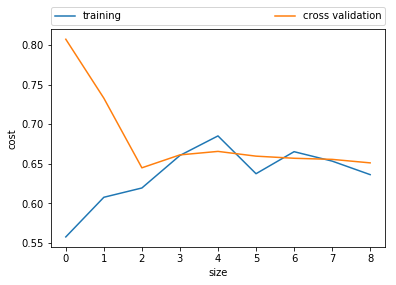

In [32]:
def learningcurve(X, Y, crossX, crossY):
    error_train = [0]*9;
    error_val = [0]*9;
    value = 0
    for i in range(10, 100 , 10):
        x1 = X[0:i, :]
        y1 = Y[:, 0:i]
       
        theta = np.zeros(x1.shape[1])
        theta = np.matrix(theta)
        theta = train(theta, x1, y1,0)
       
        error_train[value] = cost_function(theta,x1, y1, 0)
        error_val[value] = cost_function(theta, crossX, crossY, 0)
        value+=1
    return error_train, error_val
train_curve, cross_curve = learningcurve(X, Y, crossX, crossY)
import matplotlib.pyplot as plt
plt.plot(train_curve, label="training")
plt.plot(cross_curve, label="cross validation")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('cost')
plt.xlabel('size')
plt.show()